# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [2]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range(start='2017-01-01', end='2018-03-31', name='dates')
print(dates)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', name='dates', length=455, freq='D')


In [3]:
# store the parameters

u = 5 # series mean
std = 2 # std for white noise
y_i = 8 # initial y_value, will change in model
phi = 0.7 # AR slope value
data = [] # container for time series data

# for loop to generate series data
for i in range(len(dates)):
    y_i = u + (phi * (y_i - u)) + np.random.normal(loc=0, scale=std)
    data.append(y_i)
    
print(data)

[9.508794412160295, 5.840868512457625, 6.829932474776093, 2.3379702018024564, 6.163912304475009, 5.479695003554018, 6.864743821235956, 2.481802465198597, 3.089335235749995, 9.008471803455302, 6.148095934957176, 5.388260524956263, 5.8033623906394345, 7.704233027724925, 7.869872532900997, 7.0156060309405675, 6.780565517328447, 3.395545840491576, 5.669332917006241, 5.53670245631479, 2.6008022382317093, 2.5009412199453283, 3.529707684757519, 3.1450783736606884, 1.7521580516545485, 6.028003147030516, 5.412813139483401, 1.1389338236481512, 2.5286629924352746, 2.134380136506172, 3.451634705956507, 6.501163130348516, 6.66954861098585, 4.614195665089312, 4.907286155635879, 7.063668453314877, 6.813948237869125, 7.543003823075282, 2.666076995480516, 4.256935803626996, 4.68772887478159, 1.370833344707699, 5.833633528815605, 5.446802557155092, 6.3803643612334096, 4.3342693240491785, 5.39606001318057, 7.528682803854908, 4.010316271105122, 0.9571928762328854, 6.731373306692298, 6.5560836551310535, 7.

In [4]:
# generate the time series according to the formula
ar_ts = pd.Series(data=data, index=dates, name='ar_ts')
print(ar_ts)

dates
2017-01-01    9.508794
2017-01-02    5.840869
2017-01-03    6.829932
2017-01-04    2.337970
2017-01-05    6.163912
                ...   
2018-03-27    4.200595
2018-03-28    4.546712
2018-03-29    6.137843
2018-03-30    6.362679
2018-03-31    4.265401
Freq: D, Name: ar_ts, Length: 455, dtype: float64


Plot the time series and verify what you see

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


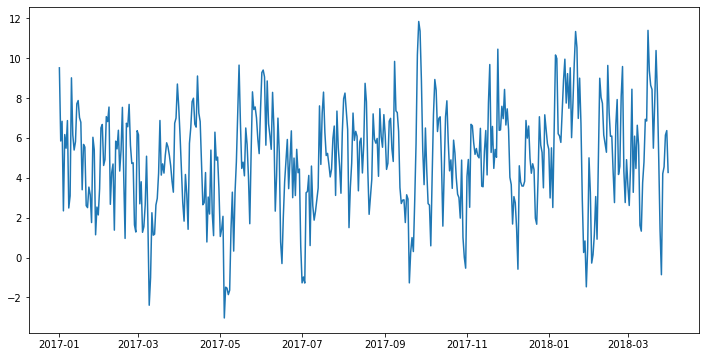

In [5]:
# plot here
plt.figure(figsize=(12,6))
plt.plot(ar_ts)
plt.show()

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

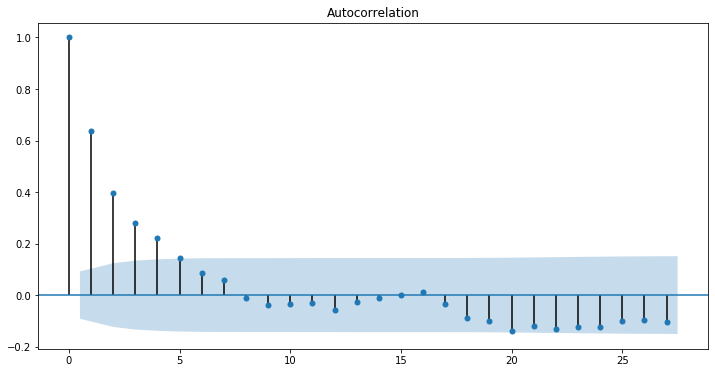

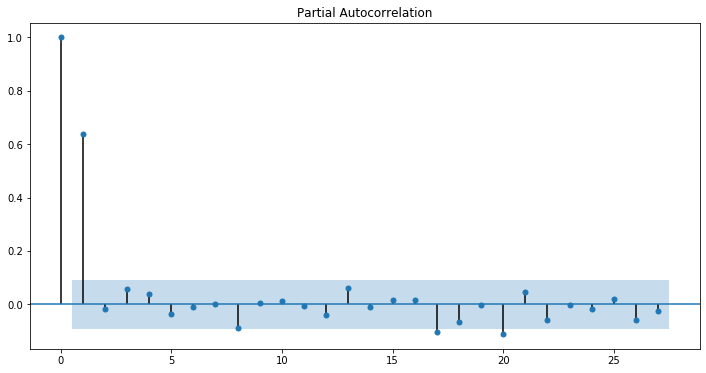

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(x=ar_ts, ax=ax);
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(x=ar_ts, ax=ax);


## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [7]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ar_ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                  ar_ts   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -965.630
Method:                       css-mle   S.D. of innovations              2.019
Date:                Tue, 07 Jan 2020   AIC                           1937.261
Time:                        19:50:11   BIC                           1949.622
Sample:                    01-01-2017   HQIC                          1942.130
                         - 03-31-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9264      0.262     18.821      0.000       4.413       5.439
ar.L1.ar_ts     0.6397      0.036     17.724      0.000       0.569       0.710
                                    Roots       

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [8]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates2 = pd.date_range(start='2015-04-01', end='2015-08-31')
print(len(dates2))
# store the parameters
mu = 7
theta = 0.9
std = 4
data = [] # container for values of generated series
noises = np.random.normal(loc=0, scale=4, size=len(dates2)) # Generate a white noise value for each date

#generate the time series
for i in range(len(dates2)):
    y = mu + noises[i] + (theta * noises[i-1])
    data.append(y)
    
print(len(data))

ts = pd.Series(data=data, index=dates2, name='MA')
ts.head()

153
153


2015-04-01     7.179265
2015-04-02     3.933264
2015-04-03     8.443315
2015-04-04    10.907138
2015-04-05     2.992098
Freq: D, Name: MA, dtype: float64

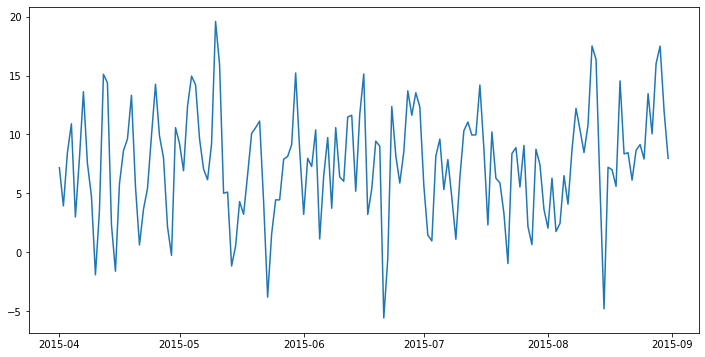

In [9]:
# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.show();

## Look at the ACF and PACF of your model and write down your conclusions

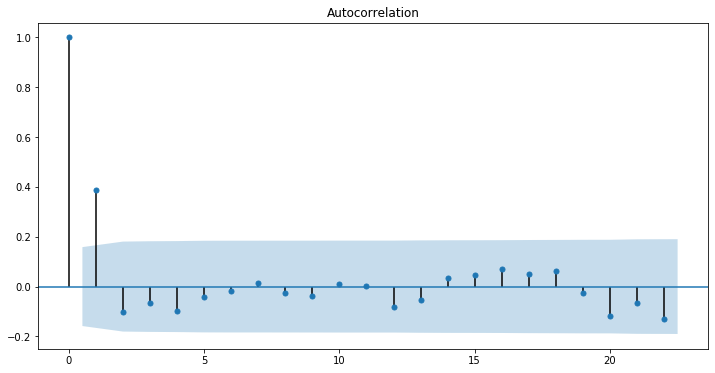

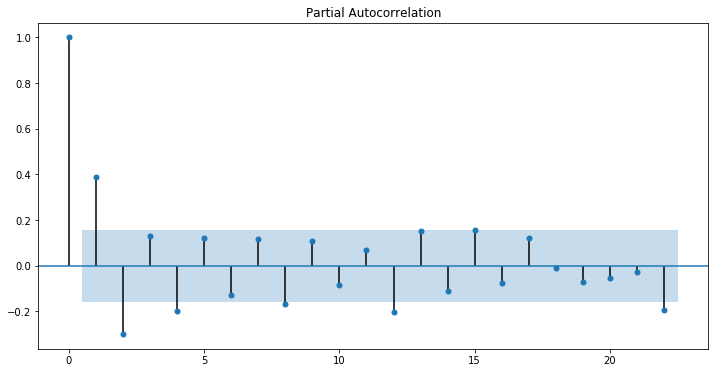

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(x=ts, ax=ax);
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(x=ts, ax=ax);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [11]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(ts, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     MA   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.637
Method:                       css-mle   S.D. of innovations              3.889
Date:                Tue, 07 Jan 2020   AIC                            857.274
Time:                        19:50:12   BIC                            866.365
Sample:                    04-01-2015   HQIC                           860.967
                         - 08-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4959      0.589     12.734      0.000       6.342       8.650
ma.L1.MA       0.8779      0.048     18.109      0.000       0.783       0.973
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1391           +0.0000j            1.1391            0.5000
-----------------------------------------------------------------------------
"""

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [52]:
# the data is in "winning_400m.csv"
data = pd.read_csv("winning_400m.csv")
data.year = data.year.astype(str)
data.year = pd.to_datetime(data.year.astype(str))

col_name= 'year'
data.set_index(col_name, inplace=True)

Plot the data

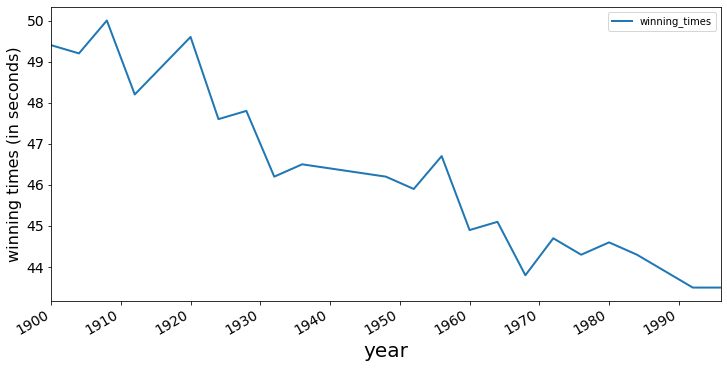

In [53]:
# your code here
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel(col_name, fontsize=20)
plt.ylabel("winning times (in seconds)", fontsize=16);

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [54]:
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


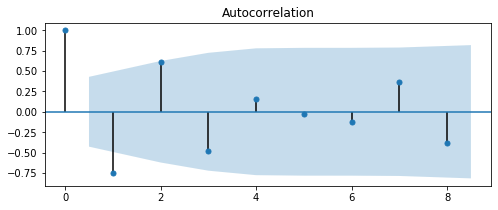

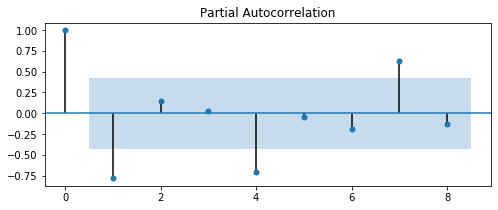

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags=8);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [56]:
# Autocorrelation seems to 'tail' off after 1, pacf seems to 'cut' off after 1
# Going to try p = 1, q = 0

# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
res_arma.summary()

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Tue, 07 Jan 2020   AIC                             46.107
Time:                        20:31:42   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [57]:
# Fit an AR(1) MA(1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(1,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
res_arma.summary()

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Tue, 07 Jan 2020   AIC                             47.916
Time:                        20:33:37   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.650      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

In [ ]:
# The ARMA(1,0) model is a slightly better fit than ARMA(1,1), though they are very close. 

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.